# Goose test page 4 (Population statistics)

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates
import configparser, os, glob
import re

simulation_start_date = dt.date(2009, 1, 1)# we should check again that this is a right date, probably should be read from somewhere
simulation_start_date_ordinal=dt.date.toordinal(simulation_start_date)
my_dateparser=(lambda x: pd.to_datetime(x,unit='D', origin=simulation_start_date))

is_timed = True

species_names = ["barnacle", "greylag", "pinkfoot"]
geese_foods = ['grain', 'grass', 'maize']
if is_timed==True:
    is_timed_str = '_timed'
else:
    is_timed_str = ''


data_dir = "rundir/"#"~/CLionProjects/GooseTests/run-directory1/"
#source_dir = "~/CLionProjects/ALMaSS_all"
field_dir ="fielddir"#"~/CLionProjects/GooseTests/ALMaSS_inputs"
# let us read the config data, it will be useful afterwards
CONFIG_PATH=data_dir+'TIALMaSSConfig.cfg'
with open(os.path.expanduser(CONFIG_PATH), 'r') as f:
    config_string = '[dummy_section]\n' + f.read()
config = configparser.ConfigParser(strict=False)
config.read_string(config_string)

Geese numbers

Text(0.5, 1.0, 'Daily population size')

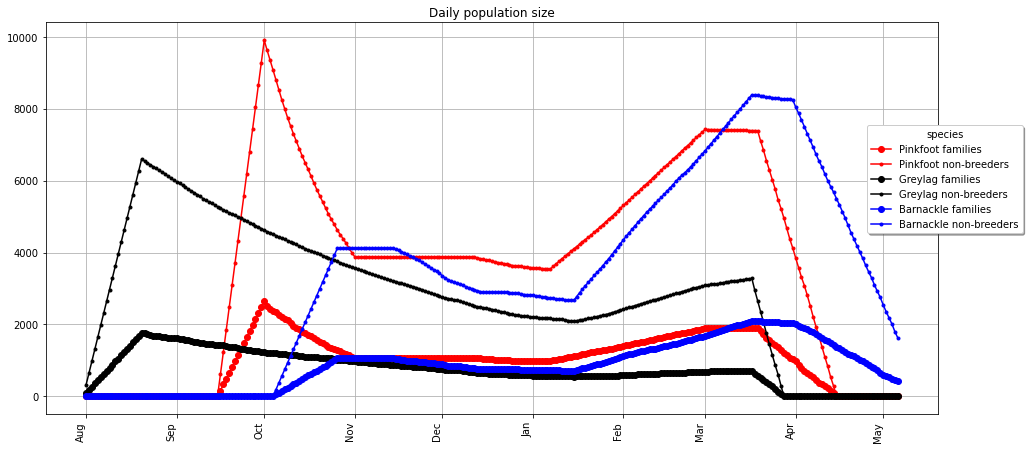

In [2]:
population_data=pd.read_csv(data_dir+"GoosePopulationData.txt", sep='\t', header=0)
population_data['daydate']=my_dateparser(np.uint(population_data['day']))
fig1, ax1 = plt.subplots(figsize=mpl.figure.figaspect(0.5)*2)
months = mdates.MonthLocator()
myFmt = mdates.DateFormatter('%b')
fig1.autofmt_xdate(rotation='vertical')
ax1.xaxis.set_major_formatter(myFmt)
ax1.xaxis.set_minor_locator(months)
ax1.xaxis_date()
ax1.grid()
time = population_data['daydate']
line1=ax1.plot(time, population_data['pf_families'], marker="o", color='r', label='Pinkfoot families')
line2=ax1.plot(time, population_data['pf_non_breeders'], marker=".", color='r', label='Pinkfoot non-breeders')
line3=ax1.plot(time, population_data['gl_families'], marker="o", color='k', label='Greylag families')
line4=ax1.plot(time, population_data['gl_non_breeders'], marker=".", color='k', label='Greylag non-breeders')
line5=ax1.plot(time, population_data['bn_families'], marker="o", color='b', label='Barnackle families')
line6=ax1.plot(time, population_data['bn_non_breeders'], marker=".", color='b', label='Barnackle non-breeders')
ax1.legend( fancybox=True, shadow=True, title='species', loc='center right',bbox_to_anchor=(1.1, 0.60))
ax1.set_title('Daily population size')

Text(0.5, 0.98, 'Daily number emmigrated')

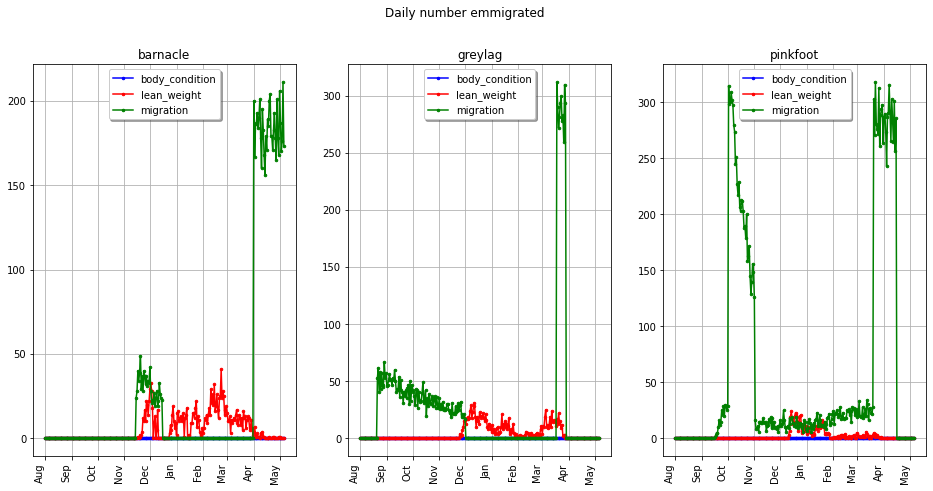

In [3]:
leave_data=pd.read_csv(data_dir+"GooseLeaveReasonStats.txt", sep='\t', header=0)
leave_data['daydate']=my_dateparser(np.uint(leave_data['day']))

fig2, ax2 = plt.subplots(1,3,figsize=mpl.figure.figaspect(0.5)*2)
months = mdates.MonthLocator()
myFmt = mdates.DateFormatter('%b')
fig2.autofmt_xdate(rotation='vertical')
colours = ['blue', 'red', 'green', 'yellow']
for i in range(3):
    ax2[i].xaxis.set_major_formatter(myFmt)
    ax2[i].xaxis.set_minor_locator(months)
    ax2[i].xaxis_date()
    ax2[i].grid()
    temp=leave_data[leave_data.species_type==species_names[i]+'_nonbreeder'].groupby(['daydate', 'leave_reason']).agg(num_left=('n', 'sum'))
    for j in range(len(temp.index.unique(1))):
        ax2[i].plot(temp.xs(temp.index.unique(1)[j],level=1).index, temp.xs(temp.index.unique(1)[j],level=1), ms=5, marker=".", color=colours[j],label=temp.index.unique(1)[j])
    ax2[i].set_title(species_names[i])
    ax2[i].legend(fancybox=True, shadow=True,loc='upper center',bbox_to_anchor=(0.5, 1.0), ncol=1)
fig2.suptitle('Daily number emmigrated')
